# Solar Report

In [1]:
import Input_template
from Input_template import *

In [2]:
## boundary files
district_boundary = "workdir/extra_inputs/shp_district/shp_district.shp"
village = "workdir/extra_inputs/shp_settlement/shp_settlement.shp"
taluk = "workdir/extra_inputs/shp_taluk/shp_taluk.shp"
## module files
theoritical = "workdir/solar/shp_solar_theo/shp_solar_theo.shp"
technical ="workdir/solar/shp_solar_tech/shp_solar_tech.shp"
high = "workdir/solar/shp_solar_high/shp_solar_high.shp"
med  = "workdir/solar/shp_solar_med/shp_solar_med.shp"
## other module high files
water_high = "workdir/water/shp_water_high/shp_water_high.shp"
forest_high = "workdir/forest/shp_forest_high/shp_forest_high.shp"
agri_high = "workdir/agri/shp_agri_high/shp_agri_high.shp"
indus_high = "workdir/industry/shp_industry_high/shp_industry_high.shp"
housing_high = "workdir/housing/shp_housing_high/shp_housing_high.shp"
## landcover shape files
Unused_land = "workdir/extra_inputs/Unused/Unused.shp" 
Sparseveg = "workdir/extra_inputs/shp_sparseveg/shp_sparseveg.shp"
Cropland = "workdir/extra_inputs/shp_cropland/shp_cropland.shp"
Forest = "workdir/extra_inputs/shp_forest/shp_forest.shp"
waterbodies = "workdir/extra_inputs/shp_water_bodies/shp_water_bodies.shp"
urban ="workdir/extra_inputs/shp_builtup/shp_builtup.shp"
access ="workdir/extra_inputs/shp_access/shp_access.shp"
## dist by size
S1 = "workdir/solar/S1/S1.shp"
S2 = "workdir/solar/S2/S2.shp"
S3 ="workdir/solar/S3/S3.shp"
## extra inputs
slope =get_rooted("workdir/raster/slope.tif")
slope_4326 = get_rooted("workdir/raster/slope_4326.tif")
GHI = get_rooted("workdir/raster/GHI_kallakurichi_cut.tif")
roads_primary  =  "workdir/extra_inputs/shp_roads_primary/shp_roads_primary.shp"
roads_secondary = "workdir/extra_inputs/shp_roads_secondary/shp_roads_secondary.shp"
railways ="workdir/extra_inputs/shp_railways/shp_railways.shp"
powerlines= "workdir/extra_inputs/shp_powerlines/shp_powerlines.shp"
substation = "workdir/extra_inputs/shp_substations/shp_substations.shp"
population ="workdir/raster/population_10_lon_70_general-v1.5.tif"

In [3]:
## boundary files
shp_district = read_df_UT(district_boundary)
shp_village = read_df_UT(village)
shp_taluk = read_df_UT(taluk)
## module files
shp_solar_theo = read_df_UT(theoritical)
shp_solar_tech = read_df_UT(technical)
shp_solar_high =read_df_UT(high)
shp_solar_med = read_df_UT(med)
## other module high files
shp_water_high = read_df_UT(water_high)
shp_forest_high = read_df_UT(forest_high)
shp_agri_high = read_df_UT(agri_high)
shp_indus_high = read_df_UT(indus_high)
shp_housing_high =read_df_UT(housing_high)
## landcover shape files
shp_unused = read_df_UT(Unused_land)
shp_waterbodies = read_df_UT(waterbodies)
shp_builtup = read_df_UT(urban)
shp_sparseveg = read_df_UT(Sparseveg)
shp_cropland = read_df_UT(Cropland)
shp_forest = read_df_UT(Forest)
shp_access = read_df_UT(access)
## dist by size
S1 = read_df_UT(S1)
S2 = read_df_UT(S2)
S3 = read_df_UT(S3)
## extra inputs
shp_roads_primary  =  read_df_UT(roads_primary)
shp_roads_secondary = read_df_UT(roads_secondary)
shp_railways = read_df_UT(railways)
shp_powerlines= read_df_UT(powerlines)
shp_substation = read_df_UT(substation)
population_raster = get_rooted(population)

## extra inputs

In [4]:
shp_roads_primary = gpd.overlay(shp_roads_primary,shp_district,how ="intersection")
shp_roads_secondary = gpd.overlay(shp_roads_secondary,shp_district,how ="intersection")
shp_railways = gpd.overlay(shp_railways,shp_district,how ="intersection")
shp_powerlines = gpd.overlay(shp_powerlines,shp_district,how ="intersection")

### adding area_acres column 

In [5]:
shp_unused = add_area_and_class(shp_unused)

## Report Tables

### Stats

In [8]:
def summarize_data(df, name):
    summary = df.groupby("area_class")["area_acres"].agg(["sum", "count"]).reset_index()
    summary.columns = ["area_class", f"{name}_sum", f"{name}_count"]
    return summary

data_frames = [shp_unused, shp_solar_theo, shp_solar_tech, shp_solar_high, shp_solar_med]
data_names = ['unused', 'theo', 'tech', 'high', 'med']

summary_dict = {}

for df, name in zip(data_frames, data_names):
    summary_dict[name] = summarize_data(df, name)

merged_summary = summary_dict['unused']
for name in data_names[1:]:
    merged_summary = pd.merge(merged_summary, summary_dict[name], on="area_class", how="outer")
merged_summary = merged_summary.fillna(0)
merged_summary

,area_class,unused_sum,unused_count,theo_sum,theo_count,tech_sum,tech_count,high_sum,high_count,med_sum,med_count
0,A,27786.609208,3015,13420.913921,1453,13164.461759,1426.0,0.000000,0.0,0.000000,0.0
1,B,29996.987052,747,14523.220527,358,14403.386665,354.0,0.000000,0.0,12818.886197,312.0
2,C,89674.832129,174,10337.938846,50,10337.938846,50.0,8689.574614,40.0,9498.806501,45.0
3,D,54091.574833,106777,31638.601225,74713,0.000000,0.0,0.000000,0.0,0.000000,0.0


## Competing use 

In [9]:
shp_solar_water= find_overlap(shp_solar_tech,"water",shp_water_high)
shp_solar_forest = find_overlap(shp_solar_tech,"forest",shp_forest_high)
shp_solar_agri =find_overlap(shp_solar_tech,"agri",shp_agri_high)
shp_solar_housing =find_overlap(shp_solar_tech,"hsing",shp_housing_high)
shp_solar_industry =find_overlap(shp_solar_tech,"indus",shp_indus_high)
combined = pd.concat([shp_indus_high,shp_agri_high,shp_water_high,shp_forest_high,shp_housing_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_solar_tech,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)
data = {
    'solar_forest': shp_solar_forest.oparforest.sum(),
    'solar_water': shp_solar_water.oparwater.sum(),
    'solar-agri':shp_solar_agri.oparagri.sum(),
    'solar-housing': shp_solar_housing.oparhsing.sum(),
    'solar-indutry': shp_solar_industry.oparindus.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

C:\Users\User\AppData\Local\Temp\ipykernel_3364\3795261815.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 609 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  inter = gpd.overlay(shp_solar_tech,combined,how ="intersection")


In [10]:
competing_use

,solar_forest,solar_water,solar-agri,solar-housing,solar-indutry,Competing use
0,3477.754389,61.326551,20624.752547,804.799161,2689.168745,23308.220096


### Distribution by type

In [11]:
S_list = [S1, S2, S3]

overlap_data = {}

land_use_categories = ['forest', 'water', 'agri', 'hsing', 'indus']
high_dataframes = [shp_forest_high, shp_water_high, shp_agri_high, shp_housing_high, shp_indus_high]


for idx, S in enumerate(S_list):
    S_op_dict = {}
    for category, high_df in zip(land_use_categories, high_dataframes):
        S_op_dict[category] = find_overlap(S, category, high_df)
    overlap_data[f"S{idx+1}"] = S_op_dict

data = []
for idx, S in enumerate(S_list):
    row_data = [
        overlap_data[f"S{idx+1}"]["forest"].oparforest.sum(),
        overlap_data[f"S{idx+1}"]["water"].oparwater.sum(),
        overlap_data[f"S{idx+1}"]["agri"].oparagri.sum(),
        overlap_data[f"S{idx+1}"]["hsing"].oparhsing.sum(),
        overlap_data[f"S{idx+1}"]["indus"].oparindus.sum()
    ]
    data.append(row_data)

Dist_by_type = pd.DataFrame(data, columns=['Forest', 'Water', 'agri', 'housing', 'industry'], index=['S1', 'S2', 'S3'])

In [12]:
Dist_by_type

,Forest,Water,agri,housing,industry
S1,952.460427,15.406184,4971.861897,208.728941,692.898917
S2,1200.242964,45.920367,7350.225650,402.250489,801.419740
S3,1325.050999,0.000000,8302.665000,193.819731,1194.850088


In [13]:
largest_plot = shp_solar_tech.area_acres.max()

In [14]:
largest_plot

846.1259984792429

In [15]:
template = load_workbook(get_rooted('workdir/solar/solar_temp.xlsx'))
ws = template['Sheet1']

# Define the ranges where to insert the dataframes
ranges = ['A2:K5','A10:F10','B13:F15']

# Insert the dataframes into the workbook
for x, r in zip([merged_summary,competing_use,Dist_by_type], ranges):
    start_col, start_row, end_col, end_row = openpyxl.utils.cell.range_boundaries(r)
    for i, row in enumerate(x.values):
        for j, value in enumerate(row):
            ws.cell(row=start_row + i, column=start_col + j, value=value)
ws.cell(row=17, column=2, value=largest_plot)           
template.save(get_in_output('solar/solar_temp_filled_new.xlsx'))

## Top15

In [16]:
shp_solar_high = shp_solar_high.sort_values(by=["area_acres"],ascending = False)
shp_solar_top15  = shp_solar_high[:15]
shp_solar_top15 .reset_index(inplace =True)

In [17]:
df = shp_solar_top15
top15_solar = calculate_slope(df, slope)

C:\Users\User\anaconda1\envs\lila\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
top15_solar['coords'] = top15_solar['geometry'].apply(lambda x: x.representative_point().coords[:])
top15_solar['coords'] = [coords[0] for coords in top15_solar['coords']]
top15_solar["coords"].tolist()
top15_solar[['lat', 'lon']] = gpd.GeoDataFrame(top15_solar['coords'].tolist(), index=top15_solar.index)

In [20]:
overlap = find_overlap(top15_solar,"forest",shp_forest_high)
overlap = find_overlap(overlap,"water",shp_water_high)
overlap = find_overlap(overlap,"agri",shp_agri_high)
overlap = find_overlap(overlap,"hsing",shp_housing_high)
overlap = find_overlap(overlap,"indus",shp_indus_high)

In [21]:
overlap.iloc[:,53:68] = overlap.iloc[:,53:68].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_3364\4045069322.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  overlap.iloc[:,53:68] = overlap.iloc[:,53:68].astype(float)


In [22]:
overlap["slr_pot(MW)"] = overlap["area_acres"]/4

In [23]:
overlap_taluk = overlap[["lat","lon","area_acres","meanGHI","slr_pot(MW)","min","max",'rdmindist', 'rdmintype', 'rddist', 'rdtype',
       'submindist', 'subminname', 'subminvolt', 'submincap', 'submindoc',
       'subdist', 'subname', 'subvoltage', 'subcap', 'subdoc', 'trmindist',
       'trminvolt', 'trdist', 'trvolt','op%forest', 'oparforest', 'cntforest', 'op%water', 'oparwater',
       'cntwater', 'op%agri', 'oparagri', 'cntagri', 'op%hsing', 'oparhsing',
       'cnthsing', 'op%indus', 'oparindus', 'cntindus','geometry']]

In [45]:
overlap_taluk.to_file(get_in_output("solar/Top15_final"))

C:\Users\User\AppData\Local\Temp\ipykernel_12112\3380972088.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  overlap_taluk.to_file(get_in_output("solar/Top15_final"))


In [24]:
overlap_taluk_excel = overlap[["lat","lon","area_acres","meanGHI","slr_pot(MW)","min","max",'rdmindist', 'rdmintype', 'rddist', 'rdtype',
       'submindist', 'subminname', 'subminvolt', 'submincap', 'submindoc',
       'subdist', 'subname', 'subvoltage', 'subcap', 'subdoc', 'trmindist',
       'trminvolt', 'trdist', 'trvolt','op%forest', 'oparforest', 'cntforest', 'op%water', 'oparwater',
       'cntwater', 'op%agri', 'oparagri', 'cntagri', 'op%hsing', 'oparhsing',
       'cnthsing', 'op%indus', 'oparindus', 'cntindus']]

In [47]:
overlap_taluk_excel.to_excel(get_in_output("solar/Top15_final.xlsx"))

In [48]:
overlap_taluk_excel.columns

Index(['lat', 'lon', 'area_acres', 'meanGHI', 'slr_pot(MW)', 'min', 'max',
       'rdmindist', 'rdmintype', 'rddist', 'rdtype', 'submindist',
       'subminname', 'subminvolt', 'submincap', 'submindoc', 'subdist',
       'subname', 'subvoltage', 'subcap', 'subdoc', 'trmindist', 'trminvolt',
       'trdist', 'trvolt', 'op%forest', 'oparforest', 'cntforest', 'op%water',
       'oparwater', 'cntwater', 'op%agri', 'oparagri', 'cntagri', 'op%hsing',
       'oparhsing', 'cnthsing', 'op%indus', 'oparindus', 'cntindus'],
      dtype='object')

In [25]:
overlap_taluk_excel[['lat', 'lon', 'area_acres',"oparforest","oparwater","oparagri","oparhsing","oparindus"]]

,lat,lon,area_acres,oparforest,oparwater,oparagri,oparhsing,oparindus
0,79.158292,11.994108,846.125998,526.346092,0.0,723.058197,0.000000,0.000000
1,79.183527,11.951256,633.356061,131.499233,0.0,633.343245,22.761394,324.026833
2,78.934017,11.806315,453.944936,12.324947,0.0,453.935750,0.000000,238.249177
3,79.149561,11.932369,384.566007,58.742288,0.0,384.558226,0.000000,0.000000
4,79.022007,11.898200,381.683502,116.788812,0.0,122.951286,0.000000,0.000000
5,79.298452,11.752837,307.732323,0.000000,0.0,307.726097,0.000000,0.000000
6,79.068570,11.752162,279.404251,118.379128,0.0,279.398597,81.801866,0.000000
7,79.163023,12.023578,278.291101,9.808902,0.0,218.052260,0.000000,0.000000
8,79.350840,11.680248,276.580170,0.000000,0.0,276.574573,0.000000,0.000000
9,78.959771,11.805635,274.136223,0.000000,0.0,274.130676,0.000000,0.000000


# Visuals

### Slope

In [31]:
slope_gdal_data = gdal.Open(slope_4326)
slope = rasterio.open(slope_4326)
GHI_gdal_data = gdal.Open(GHI)
GHI =  rasterio.open(GHI)

In [32]:
data_array = slope_gdal_data.ReadAsArray().astype(float)

gdal_band = slope_gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
    data_array[data_array == nodataval] = np.nan
a = np.nanmax(data_array)
b = np.nanmin(data_array)
print(a,b)

498.353271484375 0.0


In [33]:
AVC_grey = LinearSegmentedColormap.from_list('testCmap1', colors=['#F0F0F0', '#c3c3c3', '#969696', '#686868','#5D5B5B'], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

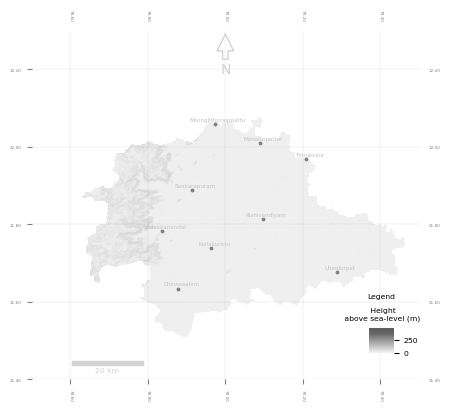

In [39]:
fig1, ax1 = plt.subplots(figsize=(5, 5))

plot_common_features(fig1, ax1)
plot_cities(fig1, ax1)

image_hidden = ax1.imshow(data_array, 
                         cmap=AVC_grey, 
                         )

cbaxes = fig1.add_axes([0.8, 0.2, 0.05, 0.05], frameon=False, title = 'Legend\n \n Height\n above sea-level (m)') 

cbar = fig1.colorbar(image_hidden, cax=cbaxes)
cbar.ax.tick_params(labelsize=5.5)
cbaxes.title.set_size(5.5)


image = rasterio.plot.show(slope, 
                      transform=slope.transform, 
                      ax=ax1, 
                      cmap=AVC_grey, 
                      )

plt.savefig(get_in_output("images/Features/Slope.jpg"),dpi =1500)
print(plt.rcParams['font.family'])

### GHI

In [57]:
gdal_band = GHI_gdal_data.GetRasterBand(1)
nodataval = 1.1754943508222875e-38


GHI_data_array = GHI_gdal_data.ReadAsArray().astype(float)
GHI_data_array


if np.any(GHI_data_array == nodataval):
    GHI_data_array[GHI_data_array == nodataval] = np.nan
    GHI_data_array[GHI_data_array == nodataval] = np.nan
a = np.nanmax(GHI_data_array)
b = np.nanmin(GHI_data_array)
print(a, b)

1981.115966796875 1761.2359619140625


In [58]:
AVC_color2 = LinearSegmentedColormap.from_list('testCmap', 
                                               colors=['#E9FF70', '#F6DE26', '#FF8811', '#F71A16', '#C4171C', '#A70B0B'], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

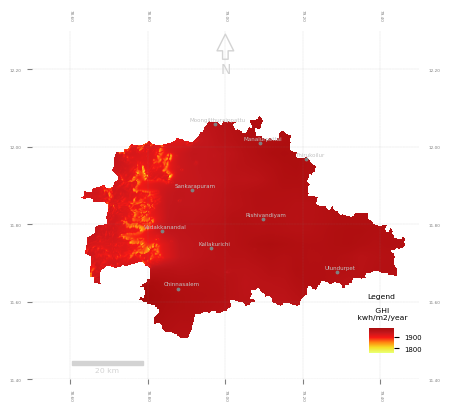

In [59]:
fig2, ax2 = plt.subplots(figsize=(5, 5))

plot_common_features(fig2, ax2)
plot_cities(fig2, ax2)


image_hidden = ax2.imshow(GHI_data_array, cmap=AVC_color2, vmin = b, vmax = a)

cbaxes = fig2.add_axes([0.8, 0.2, 0.05, 0.05], frameon=False, title = 'Legend\n \n GHI\n kwh/m2/year') 

cbar = fig2.colorbar(image_hidden, cax=cbaxes)
cbar.ax.tick_params(labelsize=5)
cbaxes.title.set_size(5.5)

image = rasterio.plot.show(GHI, 
                      transform=GHI.transform, 
                      ax=ax2, 
                      cmap=AVC_color2, 
                      vmin = b,
                      vmax = a,
                      )

plt.savefig(get_in_output("images/solar/GHI.jpg"),dpi =1500)
print(plt.rcParams['font.family'])

## Technical Suitability - Technical, theoretical, and no potential lands

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


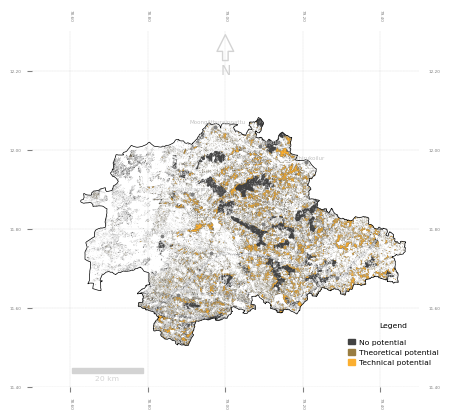

In [55]:
fig8, ax8 = plt.subplots(figsize=(5, 5))
plot_common_features(fig8, ax8)
plot_cities(fig8, ax8)
shp_district.plot(figsize=(5,5),color="none", ax=ax8, linewidth = 0.5, zorder=5)
shp_unused.plot(color="#424242",ax =ax8, label='No Potential')
shp_solar_theo.plot(color="#997D41",ax =ax8, label='Theoretical Potential')
shp_solar_tech.plot(color="#FBAF30",ax =ax8, label='Technical Potential')
No_P = mpatches.Patch(color='#424242', label='No potential')
Theo_P = mpatches.Patch(color='#997D41', label='Theoretical potential')
Tech_P = mpatches.Patch(color='#FBAF30', label='Technical potential')
plt.legend(handles = [No_P, Theo_P, Tech_P], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
print(plt.rcParams['font.family'])
plt.savefig(get_in_output("images/solar/Technical_suitability.jpg"),dpi =1500)
plt.show()

## Distribution by type

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

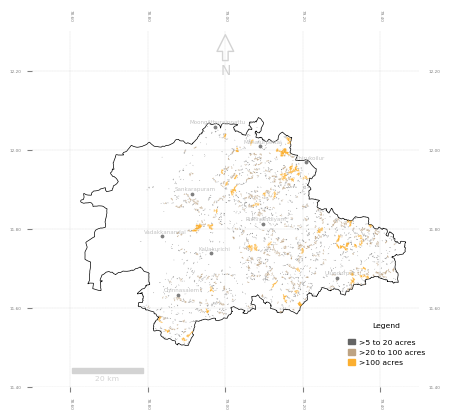

In [56]:
fig9, ax9 = plt.subplots(figsize=(5, 5))

plot_common_features(fig9, ax9)
plot_cities(fig9, ax9)

shp_district.plot(figsize=(5,5),color="none", ax=ax9, linewidth = 0.5)

S1.plot(color="#646464",ax =ax9, label='>5 to 20 acres')
S2.plot(color="#BDA383",ax =ax9, label='>20 to 100 acres')
S3.plot(color="#FBAF30",ax =ax9, label='>100 acres')

S1_ = mpatches.Patch(color='#646464', label='>5 to 20 acres')
S2_ = mpatches.Patch(color='#BDA383', label='>20 to 100 acres')
S3_ = mpatches.Patch(color='#FBAF30', label='>100 acres')
plt.legend(handles = [S1_, S2_, S3_], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/solar/Distribution by size.jpg"),dpi =1500)
plt.show()

## Accessibility

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

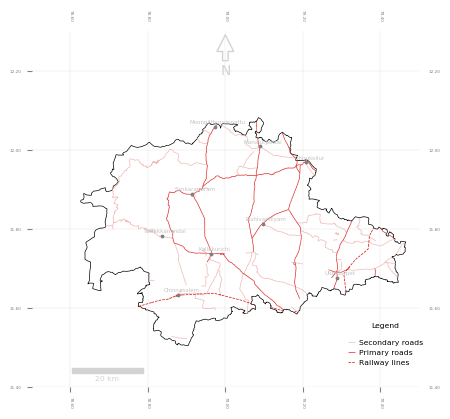

In [18]:
fig4, ax4 = plt.subplots(figsize=(5, 5))

plot_common_features(fig4, ax4)
plot_cities(fig4, ax4)

shp_district.plot(ax=ax4, figsize =(5,5),color="none",linewidth = 0.5)
shp_roads_secondary.plot(color="#f0b8b3",label ="Secondary roads",ax=ax4, linewidth=0.5)
shp_roads_primary.plot(color="#df2a29",label ="Primary roads",ax=ax4, linewidth=0.5)
shp_railways.plot(color="#da0404",label ="Railway lines",ax=ax4, linestyle='--', linewidth=0.5)

ax4.legend(loc='upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)

plt.savefig(get_in_output("images/solar/Accessibility.jpg"),dpi =1500)
plt.show()

## Power evacuation

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

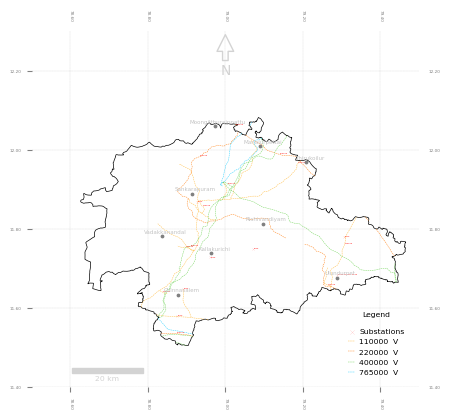

In [19]:
fig5, ax5 = plt.subplots(figsize=(5, 5))

plot_common_features(fig5, ax5)
plot_cities(fig5, ax5)

shp_powerlines['coords'] = shp_powerlines['geometry'].apply(lambda x: x.representative_point().coords[:])
shp_powerlines['coords'] = [coords[0] for coords in shp_powerlines['coords']]
 
    
shp_powerlines["coords"].tolist()
shp_powerlines[['lat', 'lon']] = gpd.GeoDataFrame(shp_powerlines['coords'].tolist(), index=shp_powerlines.index)

x = shp_powerlines["lat"]
y = shp_powerlines["lon"]    
labels =shp_powerlines["voltage"]

for i in range(0,len(shp_powerlines), 4):
    plt.text(x[i],y[i]+0.002,labels[i],fontsize=1.5,color = "red")



shp_substation['coords'] = shp_substation['geometry'].apply(lambda x: x.representative_point().coords[:])
shp_substation['coords'] = [coords[0] for coords in shp_substation['coords']]

shp_substation["coords"].tolist()
shp_substation[['lat', 'lon']] = gpd.GeoDataFrame(shp_substation['coords'].tolist(), index=shp_substation.index)

x = shp_substation["lat"]
y = shp_substation["lon"]    
labels =shp_substation["Capacity i"]

for i in range(0,len(shp_substation)):
    plt.text(x[i]+0.002,y[i],labels[i],fontsize=1.5,color = 'red', ha = 'left')
    

shp_district.plot(ax=ax5, figsize =(5,5),color="none",linewidth = 0.5)
shp_substation.plot(color='red', marker='x', markersize=2.5, ax=ax5, linewidth=0.05, label='Substations')
# shp_powerlines.plot(color="#dd2c0e",ax =ax5, linewidth=0.3, linestyle='--', label='Transmission') 
voltage_colors = {
    '110000': '#ffb62e',
    '220000': '#ff7700',
    '400000': '#63d048',
    '765000':'#14ccff'
}

for category, color in voltage_colors.items():
    shp_powerlines[shp_powerlines['voltage'] == category].plot(
        color=color,
        ax=ax5,
        linewidth=0.3,
        linestyle='--',
        label=category +" "+" V"
    )

ax5.legend(loc='upper left', bbox_to_anchor=(0.8, 0.23), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


print(plt.rcParams['font.family'])

plt.savefig(get_in_output("images/solar/powerlines.jpg"),dpi =1500) 
plt.show()

## High Potential

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

['Helvetica']


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

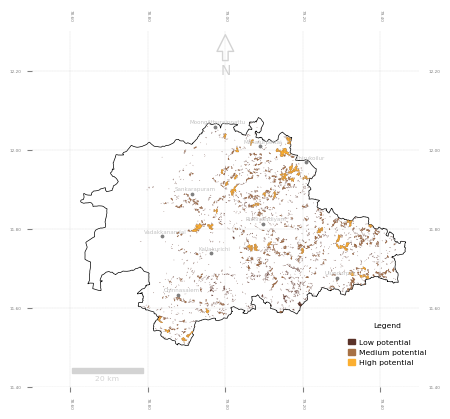

In [57]:
fig10, ax10 = plt.subplots(figsize=(5, 5))

plot_common_features(fig10, ax10)
plot_cities(fig10, ax10)

shp_district.plot(figsize=(5,5),color="none", ax=ax10, linewidth = 0.5, zorder= 1)

shp_solar_tech.plot(color="#5A3228",ax =ax10, label='Low Potential')
shp_solar_med.plot(color="#A77145",ax =ax10, label='Medium Potential')
shp_solar_high.plot(color="#FBAF31",ax =ax10, label='High Potential')


Low_P = mpatches.Patch(color='#5A3228', label='Low potential')
Med_P = mpatches.Patch(color='#A77145', label='Medium potential')
High_P = mpatches.Patch(color='#FBAF31', label='High potential')
    
plt.legend(handles = [Low_P, Med_P, High_P], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)

print(plt.rcParams['font.family'])


plt.savefig(get_in_output("images/solar/High Potential_H_M_L.jpg"),dpi =1500)
plt.show()

## Water Bodies

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


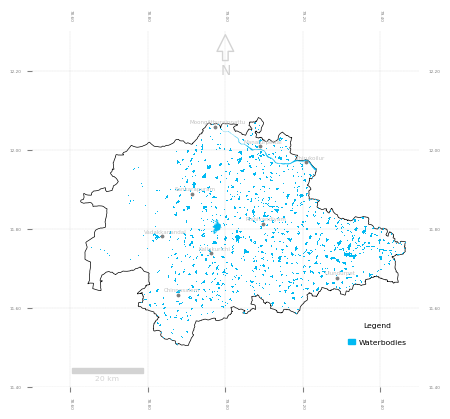

In [21]:
fig7, ax7 = plt.subplots(figsize=(5, 5))
plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)
shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)
shp_waterbodies.plot(color="#00B9F2",ax =ax7, label = 'Waterbodies')
Water = mpatches.Patch(color="#00B9F2", label = 'Waterbodies')
plt.legend(handles = [Water], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/Features/Waterbodies.jpg"),dpi =1500)
plt.show()

## Built-up with zoom in images

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

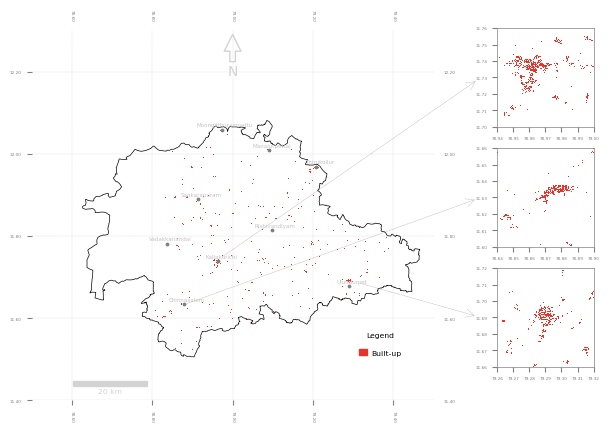

In [20]:
fig, ax = plt.subplots()
plot_common_features(fig, ax)
plot_cities(fig, ax)
fig.subplots_adjust(left=0.05, right=0.8)
shp_district.plot(ax=ax, figsize =(5,5),color="none",linewidth = 0.5)

shp_builtup.plot(color="#e73429",ax =ax, label = 'Built-up')

BU = mpatches.Patch(color="#e73429", label = 'Built-up')
 
plt.legend(handles = [BU], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)

axins1 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.9), bbox_transform=ax.figure.transFigure)
shp_builtup.plot(color="#e73429",ax =axins1, label = 'Built-up')
# adjust tick parameters and limits of zoomed inset axes
axins1.tick_params(axis='both', colors='grey', labelsize=3)
axins1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins1.set_xlim(78.94, 79.00)
axins1.set_ylim(11.70, 11.76)
axins1.spines['top'].set_edgecolor('grey')
axins1.spines['right'].set_edgecolor('grey')
axins1.spines['bottom'].set_edgecolor('grey')
axins1.spines['left'].set_edgecolor('grey')
axins1.spines['top'].set_linewidth(0.5)
axins1.spines['right'].set_linewidth(0.5)
axins1.spines['bottom'].set_linewidth(0.5)
axins1.spines['left'].set_linewidth(0.5)

zoom_patch = ConnectionPatch(xyA=(78.96, 11.74), coordsA=ax.transData,
                             xyB=(78.93, 11.73), coordsB=axins1.transData,
                             arrowstyle="->", shrinkA=5, shrinkB=5,
                             mutation_scale=15, fc="none", ec="grey")
zoom_patch.set_linestyle('dashed')
zoom_patch.set_linewidth(0.2)
ax.add_artist(zoom_patch)


axins2 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.65), bbox_transform=ax.figure.transFigure)
shp_builtup.plot(color="#e73429",ax =axins2, label = 'Built-up')
# adjust tick parameters and limits of zoomed inset axes
axins2.tick_params(axis='both', colors='grey', labelsize=3)
axins2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins2.set_xlim(78.84, 78.90)
axins2.set_ylim(11.60, 11.66)

# Modify the edge color of the inset axes
axins2.spines['top'].set_edgecolor('grey')
axins2.spines['right'].set_edgecolor('grey')
axins2.spines['bottom'].set_edgecolor('grey')
axins2.spines['left'].set_edgecolor('grey')
# Modify the line thickness of the inset axes spines
axins2.spines['top'].set_linewidth(0.5)
axins2.spines['right'].set_linewidth(0.5)
axins2.spines['bottom'].set_linewidth(0.5)
axins2.spines['left'].set_linewidth(0.5)

zoom_patch2 = ConnectionPatch(xyA=(78.87, 11.63), coordsA=ax.transData,
                             xyB=(78.83, 11.63), coordsB=axins2.transData,
                             arrowstyle="->", shrinkA=5, shrinkB=5,
                             mutation_scale=15, fc="none", ec="grey")
zoom_patch2.set_linestyle('dashed')
zoom_patch2.set_linewidth(0.2)
ax.add_artist(zoom_patch2)

axins3 = zoomed_inset_axes(ax, zoom=4, bbox_to_anchor=(1,0.4), bbox_transform=ax.figure.transFigure)
shp_builtup.plot(color="#e73429",ax =axins3, label = 'Built-up')
# adjust tick parameters and limits of zoomed inset axes
axins3.tick_params(axis='both', colors='grey', labelsize=3)
axins3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins3.set_xlim(79.26, 79.32)
axins3.set_ylim(11.66, 11.72)

# Modify the edge color of the inset axes
axins3.spines['top'].set_edgecolor('grey')
axins3.spines['right'].set_edgecolor('grey')
axins3.spines['bottom'].set_edgecolor('grey')
axins3.spines['left'].set_edgecolor('grey')
# Modify the line thickness of the inset axes spines
axins3.spines['top'].set_linewidth(0.5)
axins3.spines['right'].set_linewidth(0.5)
axins3.spines['bottom'].set_linewidth(0.5)
axins3.spines['left'].set_linewidth(0.5)

zoom_patch3 = ConnectionPatch(xyA=(79.30, 11.69), coordsA=ax.transData,
                             xyB=(79.25, 11.69), coordsB=axins3.transData,
                             arrowstyle="->", shrinkA=5, shrinkB=5,
                             mutation_scale=15, fc="none", ec="grey")
zoom_patch3.set_linestyle('dashed')
zoom_patch3.set_linewidth(0.2)
ax.add_artist(zoom_patch3)


plt.savefig(get_in_output("images/Features/BU.jpg"),dpi =1500,transparent=True)
plt.show()

# Settlement analysis

### population

In [69]:
popdf = pd.DataFrame()
for j in range(len(shp_village)):
    input_shp =  get_rooted('workdir/temp.shp')

    selection = shp_village.geometry[j:j+1]
    if selection.geometry.is_empty.bool():
        rasterarr = []
    else:
        selection.to_file(input_shp)

        input_raster= population_raster

        output_raster = get_rooted('workdir/temp.tif')
        ds = gdal.Warp(output_raster,
                      input_raster,
                      format = 'GTiff',
                      cutlineDSName = input_shp,
                      cropToCutline=True,
                      )
        ds = None
        
        raster = gdal.Open(output_raster, gdal.GA_ReadOnly)
        rasterarr = raster.ReadAsArray()
        rasterarr = np.where(rasterarr==-9999, np.nan,rasterarr)
        rasterarr = rasterarr[~np.isnan(rasterarr)]

    if (np.size(rasterarr)==0):
        popdf.at[j, "totpop"]=0
    else:    
        pop_sum = rasterarr.sum()
        popdf.at[j, "totpop"]=pop_sum

shp_village_final = pd.concat([shp_village, popdf], axis = 1)

In [71]:
shp_village_final['coords'] = shp_village_final['geometry'].apply(lambda x: x.representative_point().coords[:])
shp_village_final['coords'] = [coords[0] for coords in shp_village_final['coords']]
shp_village_final["coords"].tolist()
shp_village_final[['lat', 'lon']] = gpd.GeoDataFrame(shp_village_final['coords'].tolist(), index=shp_village_final.index) 

In [72]:
shp_village_final = shp_village_final.to_crs(32644)
shp_village_final["TGA(acres)"] = ((shp_village_final.geometry.area)/10**6)*247.105
shp_village_final = shp_village_final.to_crs(4326)

In [73]:
shp_village_tech = find_overlap(shp_village_final,"tech",shp_solar_tech)

In [74]:
shp_village_tech =  find_overlap(shp_village_tech,"unused",shp_unused)

In [75]:
shp_village_tech = shp_village_tech.to_crs(4326)

In [76]:
shp_village_tech["Solar_pot(MW)"] = shp_village_tech["opartech"]/4

### Filtering the column and converting it into float

In [77]:
shp_village_tech = shp_village_tech.iloc[:, [14,15,16,17] + list(range(44, 59))]

In [79]:
shp_village_tech.iloc[:,12:19] = shp_village_tech.iloc[:,12:19].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_12112\4175357743.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  shp_village_tech.iloc[:,12:19] = shp_village_tech.iloc[:,12:19].astype(float)


In [81]:
# add a check for zero division
shp_village_tech["capacity_p_resident"] = 0 # set initial value to 0
mask = (shp_village_tech["totpop"] != 0) & (shp_village_tech["Solar_pot(MW)"] != 0)
for i, row in shp_village_tech.iterrows():
    try:
        shp_village_tech.at[i, "cap_P_res"] = row["Solar_pot(MW)"] * 1000 / row["totpop"]
    except ZeroDivisionError:
        pass

In [82]:
shp_village_tech["cap_P_res"] = shp_village_tech["cap_P_res"].replace([np.inf, -np.inf], 0)

In [83]:
shp_village_tech= shp_village_tech[['p_name', 'd_name', 'b_name', 'p_name_rd', 'area_acres', 'area_class'
       , 'totpop', 'lat', 'lon', 'TGA(acres)', 'op%tech',
       'opartech', 'cnttech', 'op%unused', 'oparunused', 'cntunused',
       'Solar_pot(MW)', 'cap_P_res','geometry']]

In [84]:
shp_village_tech.to_file(get_in_output("solar/settlement"))

C:\Users\User\AppData\Local\Temp\ipykernel_12112\3213254803.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp_village_tech.to_file(get_in_output("solar/settlement"))


In [86]:
shp_village = shp_village_tech[['p_name', 'd_name', 'b_name', 'p_name_rd', 'area_acres', 'area_class',
       'totpop', 'lat', 'lon', 'TGA(acres)', 'op%tech', 'opartech', 'cnttech',
       'op%unused', 'oparunused', 'cntunused', 'Solar_pot(MW)', 'cap_P_res']]

In [87]:
shp_village.to_excel(get_in_output("solar/settlement.xlsx"))

In [88]:
shp_village_tech.sort_values("p_name",inplace =True)

C:\Users\User\AppData\Local\Temp\ipykernel_12112\701229067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shp_village_tech.sort_values("p_name",inplace =True)


In [89]:
shp_village_tech.reset_index(drop =True,inplace =True)

In [90]:
shp_village_tech.drop("geometry",axis =1,inplace =True)

C:\Users\User\AppData\Local\Temp\ipykernel_12112\181623506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shp_village_tech.drop("geometry",axis =1,inplace =True)


In [92]:
# shp_village_tech.to_excel(get_in_output("solar/230516_settlement_final.xlsx"))

# Settlement visuals

In [93]:
settlement = read_df_UT("output/solar/settlement/settlement.shp")

In [94]:
settlement['cap_P_res'].fillna(0, inplace=True)

In [95]:
S1 = LinearSegmentedColormap.from_list('testCmap1', colors=["#ffeb87", "#ffb639", "#df8439", "#a95829", "#823a28"], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

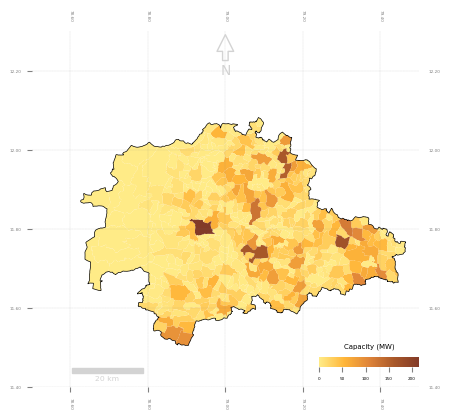

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax)

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
settlement.plot(column='Solar_pot(', cmap=S1, ax=ax)
a = settlement["Solar_pot("].min()
b = settlement["Solar_pot("].max()
sm = plt.cm.ScalarMappable(cmap=S1)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Capacity (MW)', fontsize=5)

plt.savefig(get_in_output("images/Solar_HM.jpg"),dpi =1500)
plt.show()

In [97]:
S2 = LinearSegmentedColormap.from_list('testCmap1', colors=["#ffee9c", "#ffc233", "#d09228", "#957c48", "#855c3d"], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

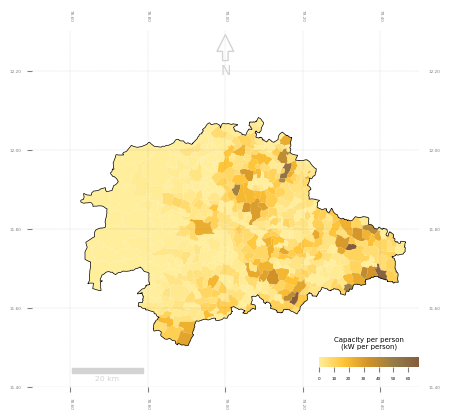

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax) 

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
settlement.plot(column='cap_P_res', cmap=S2, ax=ax)
a = settlement["cap_P_res"].min()
b = settlement["cap_P_res"].max()
sm = plt.cm.ScalarMappable(cmap=S2)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Capacity per person\n(kW per person)', fontsize=5)
plt.savefig(get_in_output("images/Capacity_per_residents_HM.jpg"),dpi =1500)
plt.show()

In [99]:
S3 = LinearSegmentedColormap.from_list('testCmap1', colors=["#fff2de", "#ffce78", "#eea54b", "#9a7343", "#5f4a4a"], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

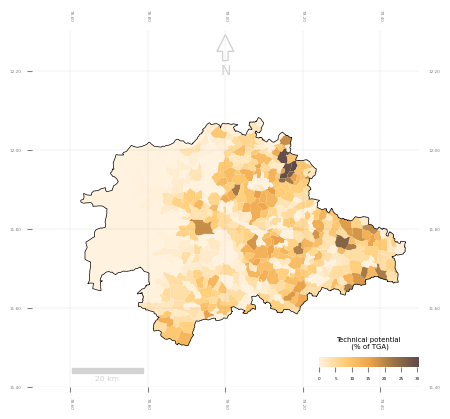

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_common_features(fig, ax)
shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
settlement.plot(column='op%tech', cmap=S3, ax=ax)
a = settlement["op%tech"].min()
b = settlement["op%tech"].max()
sm = plt.cm.ScalarMappable(cmap=S3)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Technical potential \n (% of TGA)', fontsize=5)
plt.savefig(get_in_output("images/Technical potential area(%).jpg"),dpi =1500)
plt.show()

### Taluk analysis

In [106]:
shp_taluk = gpd.overlay(shp_district,shp_taluk,how ="intersection")

In [109]:
popdf = pd.DataFrame()
output_raster = get_rooted('workdir/temp_sol.tif')
for j in range(len(shp_taluk)):
    input_shp =  get_rooted('workdir/temp_sol.shp')

    selection = shp_taluk.geometry[j:j+1]
    if selection.geometry.is_empty.bool():
        rasterarr = []
    else:
        selection.to_file(input_shp)

        input_raster= get_rooted("workdir/raster/population_10_lon_70_general-v1.5.tif")

        output_raster = output_raster
        ds = gdal.Warp(output_raster,
                      input_raster,
                      format = 'GTiff',
                      cutlineDSName = input_shp,
                      cropToCutline=True,
                      )
        ds = None

        raster = gdal.Open(output_raster, gdal.GA_ReadOnly)
        rasterarr = raster.ReadAsArray()
        #Set -9999 as no data values
        rasterarr = np.where(rasterarr==-9999, np.nan,rasterarr)
        #remove nodata values
        rasterarr = rasterarr[~np.isnan(rasterarr)]


    if (np.size(rasterarr)==0):
        popdf.at[j, "totpop"]=0


    else:    

        pop_sum = rasterarr.sum()

        popdf.at[j, "totpop"]=pop_sum

shp_taluk_final = pd.concat([shp_taluk, popdf], axis = 1)

In [111]:
shp_taluk_final['coords'] = shp_taluk_final['geometry'].apply(lambda x: x.representative_point().coords[:])
shp_taluk_final['coords'] = [coords[0] for coords in shp_taluk_final['coords']]
shp_taluk_final["coords"].tolist()
shp_taluk_final[['lat', 'lon']] = gpd.GeoDataFrame(shp_taluk_final['coords'].tolist(), index=shp_taluk_final.index) 

In [112]:
shp_taluk_final = shp_taluk_final.to_crs(32644)
shp_taluk_final["TGA(acres)"] = ((shp_taluk_final.geometry.area)/10**6)*247.105
shp_taluk_final = shp_taluk_final.to_crs(4326)

In [113]:
shp_taluk_final = find_overlap(shp_taluk_final,"tech",shp_solar_tech)

In [114]:
shp_taluk_final['geometry'] = shp_taluk_final['geometry'].apply(lambda x: shape(x).buffer(0).buffer(0.0000000000001))
shp_taluk_finalshp_taluk_final = gpd.GeoDataFrame(shp_taluk_final, geometry='geometry')
shp_taluk_final = shp_taluk_final.loc[shp_taluk_final.is_valid]

In [115]:
shp_taluk_final =  find_overlap(shp_taluk_final,"unused",shp_unused)

In [117]:
shp_taluk_final = shp_taluk_final.to_crs(4326)

In [118]:
shp_taluk_final["Solar_pot(MW)"] = shp_taluk_final["opartech"]/4

In [119]:
shp_taluk_final["cap_P_res"] = (shp_taluk_final["Solar_pot(MW)"] * 1000) / shp_taluk_final["totpop"]

In [121]:
shp_taluk_solar= shp_taluk_final[['Taluk_name', 'area_acres'
       , 'totpop', 'lat', 'lon', 'TGA(acres)', 'op%tech',
       'opartech', 'cnttech', 'op%unused', 'oparunused', 'cntunused',
       'Solar_pot(MW)', 'cap_P_res','geometry']]

In [122]:
shp_taluk_solar.to_file(get_in_output("solar/shp_taluk"))

C:\Users\User\AppData\Local\Temp\ipykernel_12112\1252302879.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp_taluk_solar.to_file(get_in_output("solar/shp_taluk"))


In [123]:
shp_taluk_final.drop("geometry",axis =1,inplace =True)

In [124]:
shp_taluk_final.to_excel(get_in_output("solar/taluk_analysis.xlsx"))